In [13]:
import pandas as pd

df = pd.read_csv("medical_insurance.csv")
print(df.shape)             
dups = df.duplicated().sum()
print("Duplicates:", dups)  
df = df.drop_duplicates()
print(df.shape)             
df.head()


(2772, 7)
Duplicates: 1435
(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
!pip install mlflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import mlflow, mlflow.sklearn
import joblib

  Using cached mlflow-3.3.2-py3-none-any.whl.metadata (30 kB)
  Using cached mlflow_skinny-3.3.2-py3-none-any.whl.metadata (31 kB)
  Using cached mlflow_tracing-3.3.2-py3-none-any.whl.metadata (19 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached databricks_sdk-0.65.0-py3-none-any.whl.metadata (39 kB)
  Using cached fastapi-0.116.1-py3-none-any.whl.metadata (28 kB)
  Using cached opentelemetry_api-1.36.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached opentelemetry_sdk-1.36.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached sqlparse-0.5.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached uvicorn-0.35.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached graphql_core-3.2.6-py3-none-any.whl.metadata (11 kB)
  Using cached graphql_relay-3.2.0-py3-none-any.whl.metadata (12 kB)
  Using cached google_auth-2.40.3-py2.py3-none-a

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


None

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


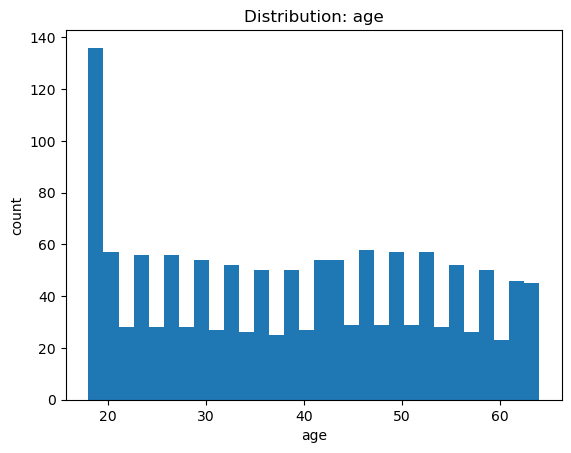

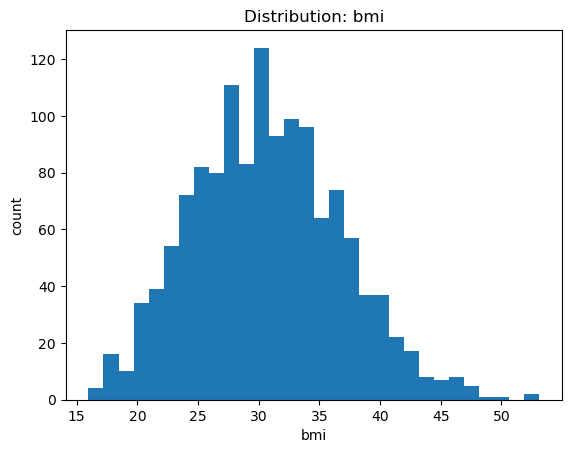

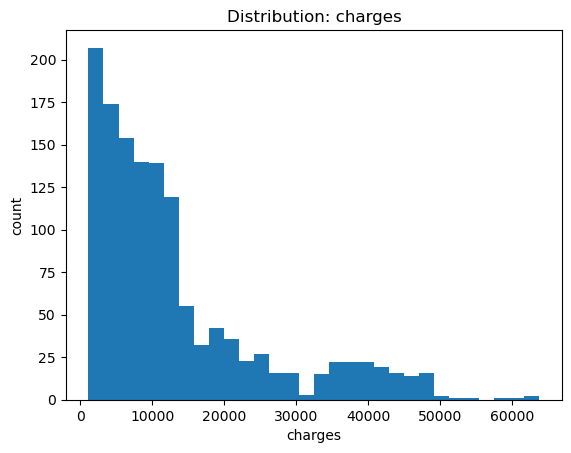

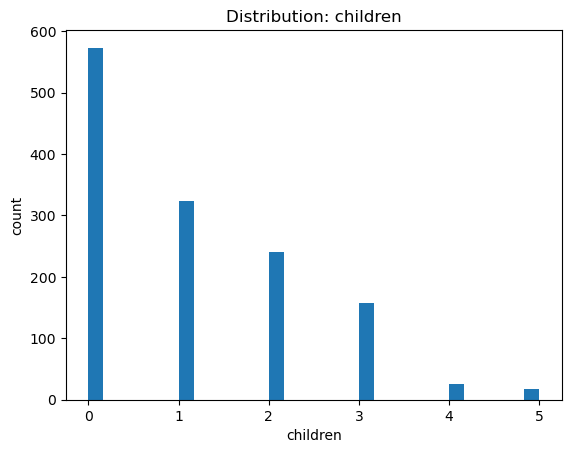

smoker
no     1063
yes     274
Name: count, dtype: int64
sex
male      675
female    662
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


In [17]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("medical_insurance.csv").drop_duplicates()

# Nulls & types
display(df.info())
display(df.describe(include='all'))

# Univariate distributions
for col in ["age","bmi","charges","children"]:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col); plt.ylabel("count")
    plt.show()

# Categorical counts
print(df["smoker"].value_counts())
print(df["sex"].value_counts())
print(df["region"].value_counts())


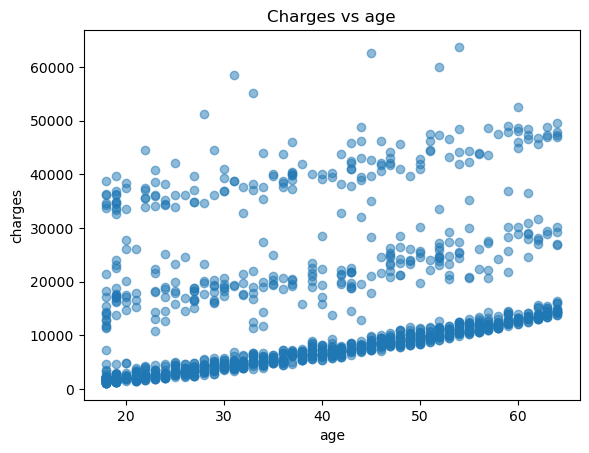

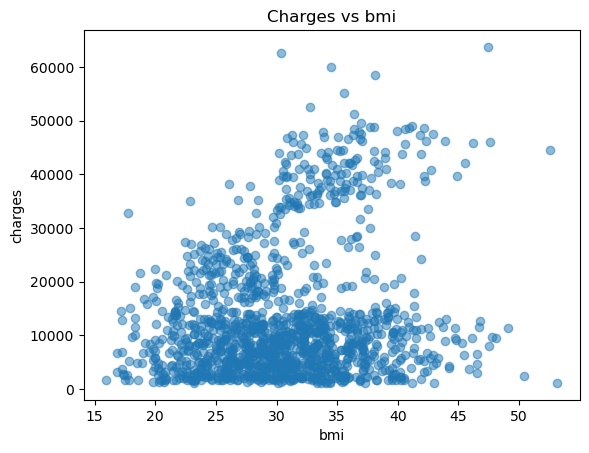

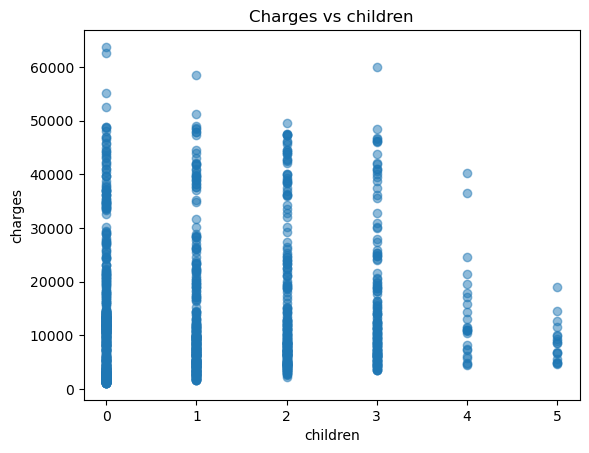

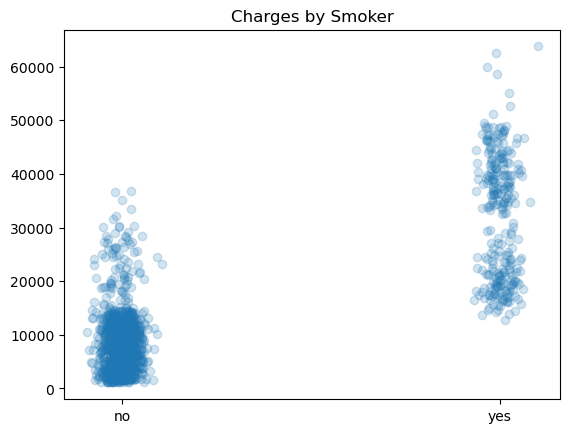

In [18]:
for col in ["age","bmi","children"]:
    plt.figure()
    plt.scatter(df[col], df["charges"], alpha=0.5)
    plt.title(f"Charges vs {col}")
    plt.xlabel(col); plt.ylabel("charges")
    plt.show()

# Box-like: smokers vs non-smokers (simple scatter+noise)
import numpy as np
plt.figure()
x = (df["smoker"]=="yes").astype(int) + np.random.normal(0,0.03, size=len(df))
plt.scatter(x, df["charges"], alpha=0.2)
plt.xticks([0,1], ["no","yes"])
plt.title("Charges by Smoker")
plt.show()


In [19]:
df["obese"] = (df["bmi"] >= 30).astype(int)
display(df.groupby(["smoker","obese"])["charges"].mean().unstack())


obese,0,1
smoker,,
no,7977.029520,8855.531349
yes,21363.217016,41557.989840


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 1) Load & clean
df = pd.read_csv("medical_insurance.csv").drop_duplicates()

X = df.drop(columns=["charges"])
y = df["charges"]

num_features = ["age","bmi","children"]
cat_features = ["sex","smoker","region"]

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=10.0),
    "Lasso": Lasso(alpha=0.001, max_iter=5000),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

results = []
fitted = {}

for name, mdl in models.items():
    pipe = Pipeline([("prep", preprocess), ("model", mdl)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    results.append((name, rmse, mae, r2))
    fitted[name] = pipe

import pandas as pd
res = pd.DataFrame(results, columns=["model","RMSE","MAE","R2"]).sort_values("RMSE")
display(res)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

,model,RMSE,MAE,R2
4,GradientBoosting,4271.894268,2535.062045,0.900689
3,RandomForest,4637.139457,2551.943475,0.882980
2,Lasso,5956.344096,4177.046379,0.806929
0,LinearRegression,5993.307901,4219.048407,0.804525
1,Ridge,6039.361926,4260.144629,0.801509


In [21]:
# First, install the xgboost package
!pip install xgboost

# Then import the required libraries
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

xgb = XGBRegressor(
    n_estimators=500, max_depth=4,
    learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
    random_state=42
)
pipe_xgb = Pipeline([("prep", preprocess), ("model", xgb)])
pipe_xgb.fit(X_train, y_train)
pred = pipe_xgb.predict(X_test)

rmse = mean_squared_error(y_test, pred, squared=False)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("XGB:", rmse, mae, r2)

XGB: 4575.229889641615 2784.104863394706 0.8860841482848253


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
import joblib
best_name = res.iloc[0]["model"]
best_model = fitted[best_name]
joblib.dump(best_model, "model_pipeline.joblib")
print("Saved:", best_name)


Saved: GradientBoosting


In [23]:
!pwd

/Users/hritvikdadhich/medical-insurance


In [25]:
# Import necessary libraries first
import mlflow
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


models = {
    
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}



# Set up MLflow experiment
mlflow.set_experiment("medical-insurance-regression")

results = []
best_model, best_rmse = None, 1e9

for name, mdl in models.items():
    with mlflow.start_run(run_name=name):
        pipe = Pipeline([('prep', preprocess), ('model', mdl)])
        pipe.fit(X_train, y_train)
        pred = pipe.predict(X_test)

        rmse = mean_squared_error(y_test, pred, squared=False)
        mae = mean_absolute_error(y_test, pred)
        r2 = r2_score(y_test, pred)

        mlflow.log_param('model', name)
        mlflow.log_metrics({'rmse': rmse, 'mae': mae, 'r2': r2})
        mlflow.sklearn.log_model(pipe, artifact_path='model')

        results.append((name, rmse, mae, r2))

        if rmse < best_rmse:
            best_rmse, best_model = rmse, pipe

# Display results
import pandas as pd
pd.DataFrame(results, columns=['Model','RMSE','MAE','R2']).sort_values('RMSE')

# Save best model
joblib.dump(best_model, 'model_pipeline.joblib')
print('Best model saved as model_pipeline.joblib')

2025/09/03 00:04:06 INFO mlflow.tracking.fluent: Experiment with name 'medical-insurance-regression' does not exist. Creating a new experiment.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2025/09/03 00:04:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/03 00:04:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2025/09/03 00:04:09 WARNI

Best model saved as model_pipeline.joblib
